<a href="https://colab.research.google.com/gist/tej87681088/914d6dbf634e03decdb1827733337444/tejapi_medium-18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime, timedelta 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tejapi
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip'
!mkdir /tmp/fonts
!unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
!mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
!rm -rf /tmp/fonts
!rm NotoSansCJKtc-hinted.zip
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

font_dirs = ['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"



--2022-04-20 08:34:42--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M   163MB/s    in 0.7s    

2022-04-20 08:34:42 (163 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: /tmp/fonts/LICENSE_OFL.txt  
  inflating: /tmp/fonts/NotoSansCJKtc-Black.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Bold.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-DemiLight.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Light.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Medium.otf  
  inflating

In [ ]:
tejapi.ApiConfig.api_key=""###yourkey


In [ ]:
df=pd.read_excel("/content/美國公債殖利率.xlsx")


In [ ]:
df

,日期,US3M,US2Y,US10Y
0,1990-01-04,7.84,7.92,7.98
1,1990-01-05,7.79,7.90,7.99
2,1990-01-06,NaN,NaN,NaN
3,1990-01-08,7.79,7.90,8.02
4,1990-01-09,7.80,7.91,8.02
...,...,...,...,...
8336,2022-03-30,0.55,2.31,2.35
8337,2022-03-31,0.52,2.28,2.32
8338,2022-04-01,0.53,2.44,2.39
8339,2022-04-05,0.66,2.43,2.42


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)


In [ ]:
df["dif2Y"]=df.US10Y-df.US2Y


In [ ]:
df["invertkeepday"]=df["dif2Y"].apply(lambda x : 1 if x < 0 else 0 )
df["cross"]=np.nan
df["notcross"]=np.nan

In [ ]:
df

,日期,US3M,US2Y,US10Y,dif2Y,invertkeepday,cross,notcross
0,1990-01-04,7.84,7.92,7.98,0.06,0,NaN,NaN
1,1990-01-05,7.79,7.90,7.99,0.09,0,NaN,NaN
2,1990-01-08,7.79,7.90,8.02,0.12,0,NaN,NaN
3,1990-01-09,7.80,7.91,8.02,0.11,0,NaN,NaN
4,1990-01-10,7.75,7.91,8.03,0.12,0,NaN,NaN
...,...,...,...,...,...,...,...,...
7584,2022-03-30,0.55,2.31,2.35,0.04,0,NaN,NaN
7585,2022-03-31,0.52,2.28,2.32,0.04,0,NaN,NaN
7586,2022-04-01,0.53,2.44,2.39,-0.05,1,NaN,NaN
7587,2022-04-05,0.66,2.43,2.42,-0.01,1,NaN,NaN


In [ ]:
startday=[]
endday  =[]
keep = 0 
df=df.copy()
for i in range(len(df)):
    if df["invertkeepday"][i]  >0 :
        if keep == 0:        
            df["cross"][i]=df["US10Y"][i]
            startday.append(df["日期"][i])
            keep = 1
    elif  keep == 1 :
        df["notcross"][i]=df["US10Y"][i]

        if  df["invertkeepday"][i] < 1 :
            endday.append(df["日期"][i])
            keep = 0    
                    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
df

,日期,US3M,US2Y,US10Y,dif2Y,invertkeepday,cross,notcross
0,1990-01-04,7.84,7.92,7.98,0.06,0,NaN,NaN
1,1990-01-05,7.79,7.90,7.99,0.09,0,NaN,NaN
2,1990-01-08,7.79,7.90,8.02,0.12,0,NaN,NaN
3,1990-01-09,7.80,7.91,8.02,0.11,0,NaN,NaN
4,1990-01-10,7.75,7.91,8.03,0.12,0,NaN,NaN
...,...,...,...,...,...,...,...,...
7584,2022-03-30,0.55,2.31,2.35,0.04,0,NaN,NaN
7585,2022-03-31,0.52,2.28,2.32,0.04,0,NaN,NaN
7586,2022-04-01,0.53,2.44,2.39,-0.05,1,2.39,NaN
7587,2022-04-05,0.66,2.43,2.42,-0.01,1,NaN,NaN


In [ ]:
       
for start , end  in zip(startday,endday):
    print(start , end, end-start)

1990-03-08 00:00:00 1990-03-30 00:00:00 22 days 00:00:00
1998-05-26 00:00:00 1998-05-27 00:00:00 1 days 00:00:00
1998-06-09 00:00:00 1998-06-12 00:00:00 3 days 00:00:00
1998-06-15 00:00:00 1998-07-10 00:00:00 25 days 00:00:00
1998-07-21 00:00:00 1998-07-28 00:00:00 7 days 00:00:00
2000-02-09 00:00:00 2000-02-10 00:00:00 1 days 00:00:00
2000-02-11 00:00:00 2000-12-27 00:00:00 320 days 00:00:00
2000-12-28 00:00:00 2000-12-29 00:00:00 1 days 00:00:00
2005-12-27 00:00:00 2005-12-28 00:00:00 1 days 00:00:00
2005-12-29 00:00:00 2006-01-03 00:00:00 5 days 00:00:00
2006-02-03 00:00:00 2006-03-08 00:00:00 33 days 00:00:00
2006-03-21 00:00:00 2006-03-30 00:00:00 9 days 00:00:00
2006-06-08 00:00:00 2006-06-29 00:00:00 21 days 00:00:00
2006-06-30 00:00:00 2006-07-27 00:00:00 27 days 00:00:00
2006-08-02 00:00:00 2006-08-04 00:00:00 2 days 00:00:00
2006-08-07 00:00:00 2006-08-08 00:00:00 1 days 00:00:00
2006-08-14 00:00:00 2006-08-16 00:00:00 2 days 00:00:00
2006-08-17 00:00:00 2007-03-21 00:00:00 2

In [ ]:

inverted=pd.DataFrame(endday,startday)
inverted.reset_index(inplace=True)
inverted["year"]=inverted["index"].dt.year
datetime=inverted.groupby('year')
datetime=list(datetime)
getstart=[]
getend  =[]
for i  in datetime :
    i[1].reset_index(drop=True,inplace=True)
    start = i[1]["index"][0]
    end = i[1][ 0][len(i[1])-1]
    getstart.append(start)
    getend.append(end)
for start , end  in zip(getstart,getend):
    print(start , end, end-start)

1990-03-08 00:00:00 1990-03-30 00:00:00 22 days 00:00:00
1998-05-26 00:00:00 1998-07-28 00:00:00 63 days 00:00:00
2000-02-09 00:00:00 2000-12-29 00:00:00 324 days 00:00:00
2005-12-27 00:00:00 2006-01-03 00:00:00 7 days 00:00:00
2006-02-03 00:00:00 2007-03-21 00:00:00 411 days 00:00:00
2007-05-03 00:00:00 2007-06-06 00:00:00 34 days 00:00:00
2019-08-27 00:00:00 2019-08-30 00:00:00 3 days 00:00:00
2022-04-01 00:00:00 2022-04-06 00:00:00 5 days 00:00:00


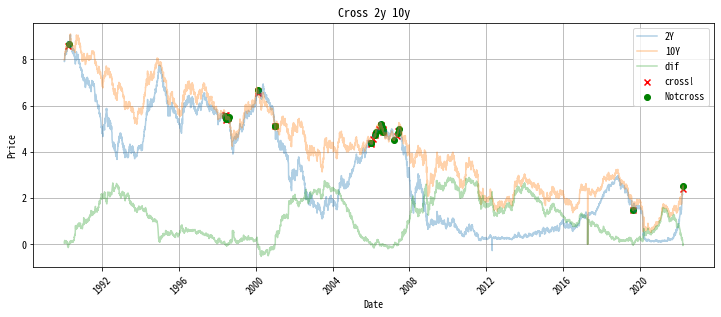

In [ ]:
df.set_index("日期",inplace=True)

plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['cross'],color='red', label='cross!',marker='x',alpha=1)
plt.scatter(df.index,df['notcross'],color='green', label='Notcross',marker='o',alpha=1)
plt.plot(df["US2Y"], label='2Y', alpha=0.35)
plt.plot(df["US10Y"], label='10Y', alpha=0.35)
plt.plot(df["dif2Y"], label='dif', alpha=0.35)

plt.title('Cross 2y 10y')
#字斜45度角
plt.xticks(rotation=45)
plt.xlabel('Date')  
plt.ylabel('Price')
plt.legend()
plt.grid()


In [ ]:
df[df["US2Y"]==0]
df.drop(index="2017-04-14",axis=1,inplace=True)

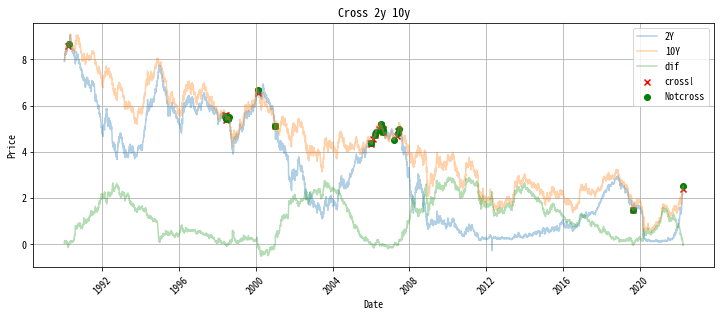

In [ ]:

plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['cross'],color='red', label='cross!',marker='x',alpha=1)
plt.scatter(df.index,df['notcross'],color='green', label='Notcross',marker='o',alpha=1)
plt.plot(df["US2Y"], label='2Y', alpha=0.35)
plt.plot(df["US10Y"], label='10Y', alpha=0.35)
plt.plot(df["dif2Y"], label='dif', alpha=0.35)

plt.title('Cross 2y 10y')
#字斜45度角
plt.xticks(rotation=45)
plt.xlabel('Date')  
plt.ylabel('Price')
plt.legend()
plt.grid()

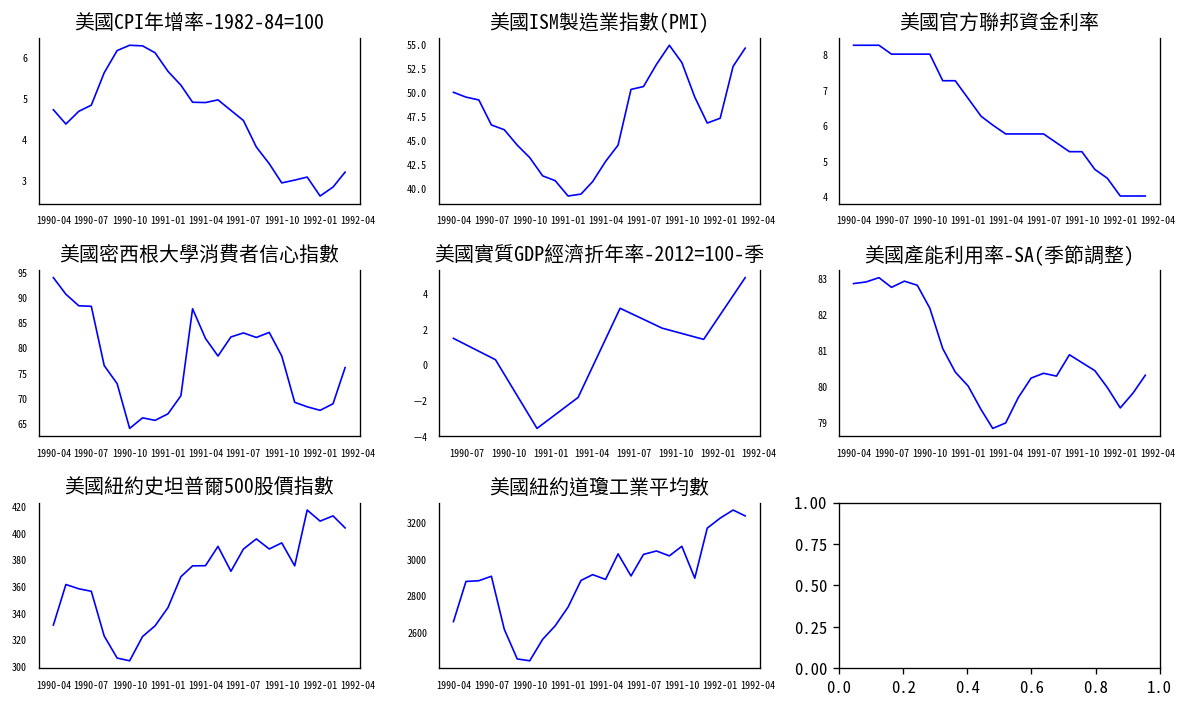

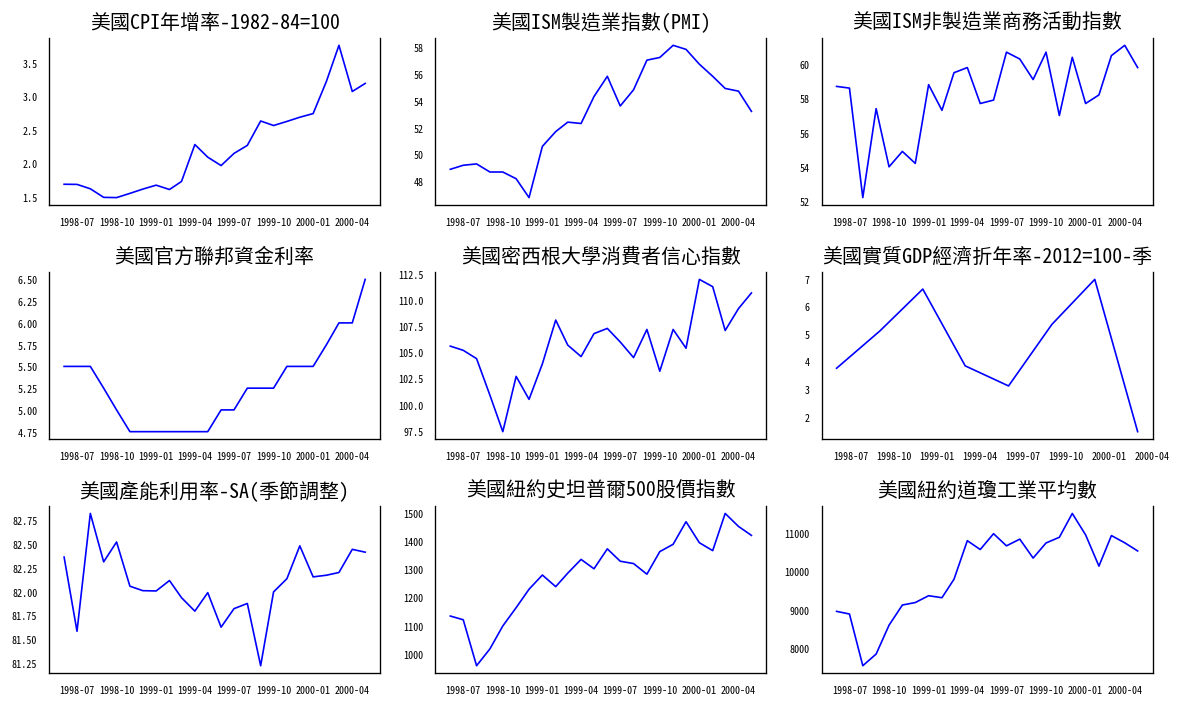

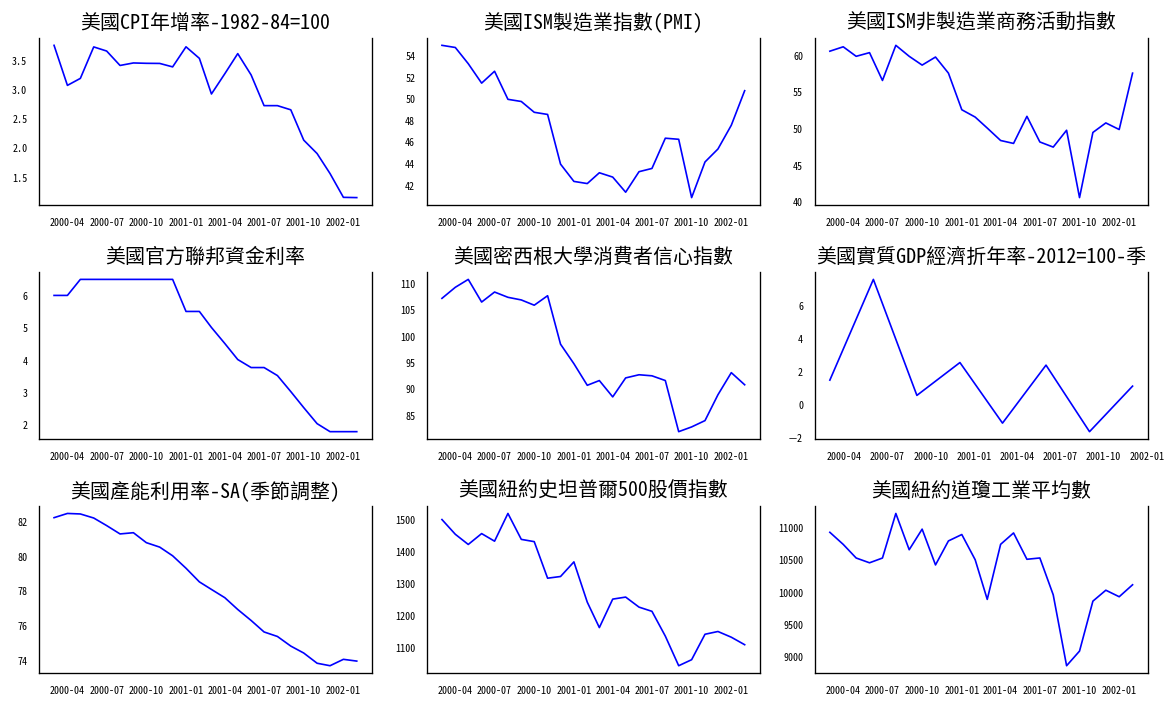

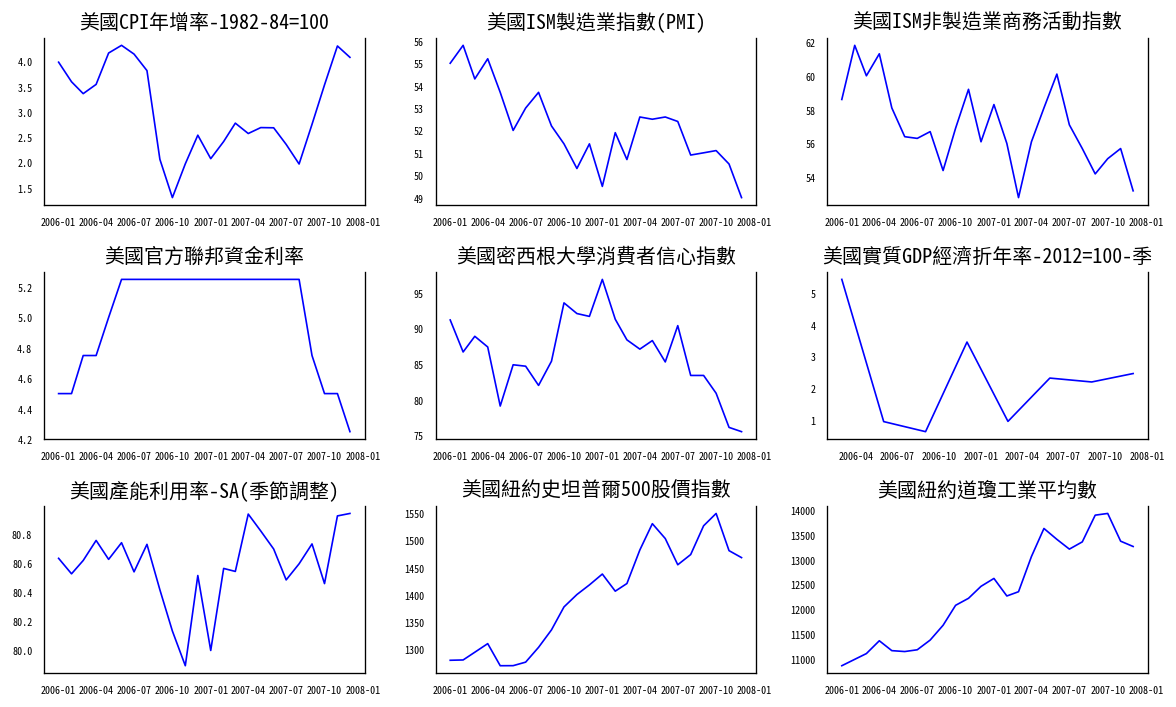

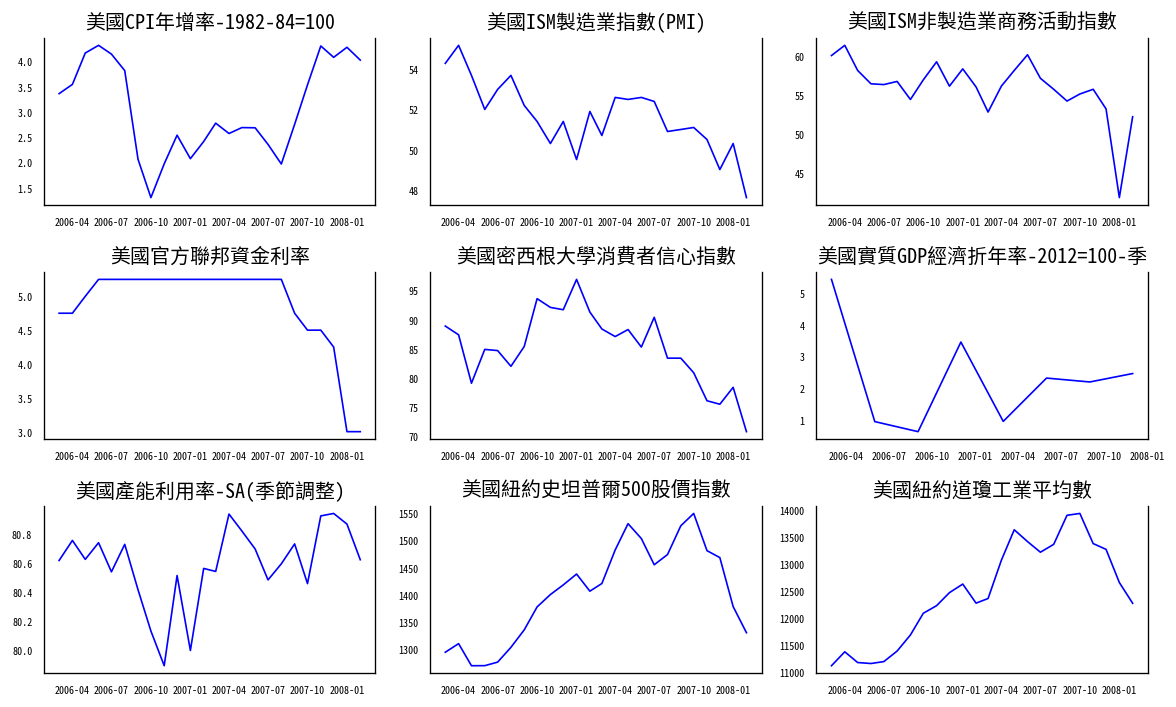

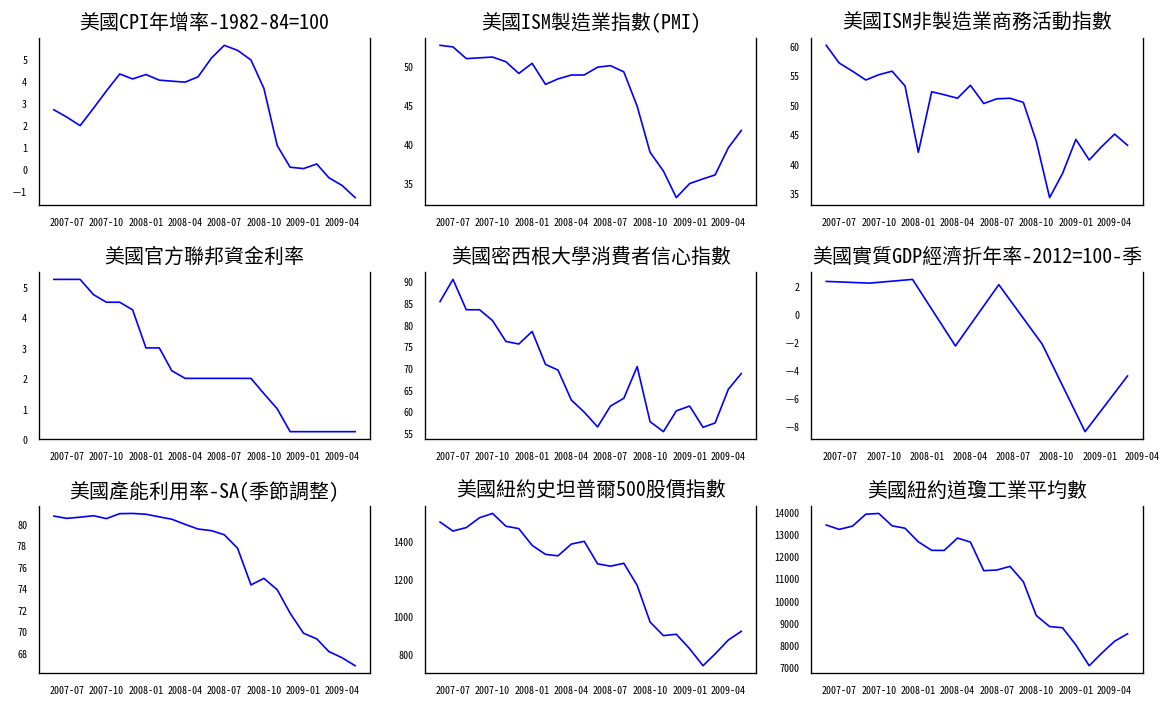

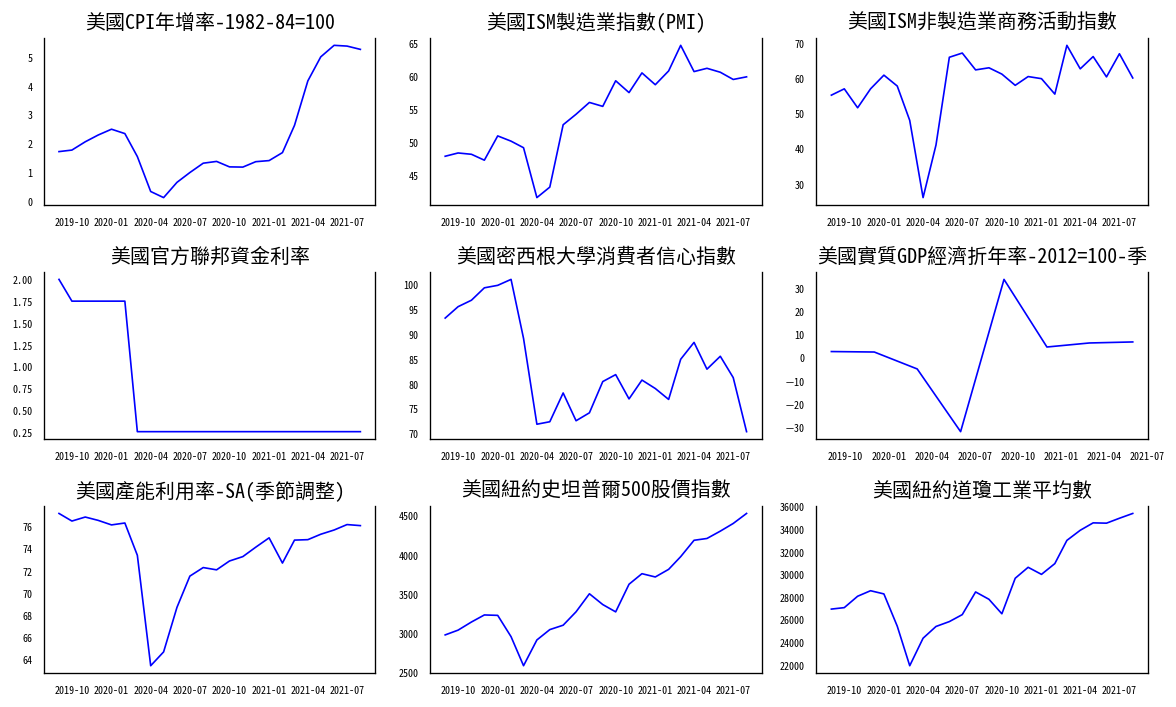

In [ ]:
from dateutil.relativedelta import relativedelta
for i in range(len(datetime)):
    
    start = datetime[i][1]["index"][0]
    end = start + relativedelta(years=+2)
    opts=["CA2136",'CA32'  ,'CA3301', 'CA34', 'CA3402','CA2402','CA0602' ,'SB03' ,'SB23' ,"CA0202 GDP"         ]
    data = tejapi.get('GLOBAL/ANMAR',
                           coid=opts,
         mdate={'gt':start,'lt':end},
                       paginate=True,
            chinese_column_name=True,
                           )

    data1=data.groupby("代碼")
    data1=list(data1)
    datadescribe = tejapi.get('GLOBAL/ABMAR',
                      coid=opts,
                    # opts="cname",
    # mdate={'gt':start,'lt':end},
                  paginate=True,
        chinese_column_name=True,
                      )
    #######################  use drscribe  to merge 
    data.rename(columns={"代碼" : "總經代碼"},inplace=True)

    mergedf=pd.merge(data,datadescribe,on = '總經代碼' )

    mergedata=mergedf.groupby("中文全稱")
    mergedata=list(mergedata)


    try :
        dataineed=pd.DataFrame(index=mergedata[0][1]["年月"])
    except IndexError:
        break
    fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,6))
    for a, ax in enumerate(axes.flatten()):
        try :
            df = mergedata[a][1].set_index("年月")
            ax.set_title(df["中文全稱"][0])
            dataineed[str(df["中文全稱"][0])]=0
            dataineed[str(df["中文全稱"][0])]=df["數值"]

            df = df["數值"]
        # dataineed[str(df["中文全稱"][0])]=df
            ax.plot(df, color='blue', linewidth=1)
            # Decorations
            ax.xaxis.set_ticks_position('none')
            ax.yaxis.set_ticks_position('none')
            ax.spines["top"].set_alpha(0)
            ax.tick_params(labelsize=6)
        except IndexError :
            break
    plt.tight_layout(); 
    trace0= go.Scatter(
            x = dataineed.index,
            y = dataineed['美國紐約道瓊工業平均數'],
            mode ='lines',
            name = 'Dow Jones',
            yaxis='y2'
    )
    trace1 = go.Scatter(
            x = dataineed.index,
            y = dataineed['美國實質GDP經濟折年率-2012=100-季'],
            mode ='markers',
            name = 'gdp'
    )
    trace2= go.Scatter(
            x = dataineed.index,
            y = dataineed['美國CPI年增率-1982-84=100'],
            mode ='lines',
            name = 'Cpi',
            )
    trace3= go.Scatter(
            x = dataineed.index,
            y = dataineed['美國官方聯邦資金利率'],
            mode ='lines',
            name = 'Fed fund rate',
            )
            
    data=[trace0,trace1,trace2,trace3]
    # layout = go.Layout(title='Average Away and Home Team Goals Per Year')

    layout = go.Layout(
        yaxis2=dict(anchor='x', overlaying='y', side='right')#設置座標軸的格式，一般次座標軸在右側
    )
    fig = go.Figure(data=data,layout=layout)

    fig.show()
